## Univariate Performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
from feature_engine.selection import SelectBySingleFeaturePerformance
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Classification

In [3]:
data = pd.read_csv('../dataset_2.csv')
print(data.shape)
data.head(1)

(50000, 109)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.53271,3.280834,17.982476,4.404259,2.34991,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417


In [4]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [5]:
# set up a machine learning model
rf = RandomForestClassifier( n_estimators=10, random_state=1, n_jobs=4)
# set up the selector
sel = SelectBySingleFeaturePerformance( variables=None, estimator=rf, scoring="roc_auc", cv=3, threshold=0.5,)
# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_estimators=10,
                                                                  n_jobs=4,
                                                                  random_state=1),
                                 threshold=0.5)

In [6]:
#  the transformer stores a dictionary of feature:metric pairs in this case is the roc_auc of each individual model
sel.feature_performance_

{'var_1': 0.4875860227005642,
 'var_2': 0.5058395029284825,
 'var_3': 0.4905863771559731,
 'var_4': 0.5012815978721906,
 'var_5': 0.5015549182496443,
 'var_6': 0.5002461971914826,
 'var_7': 0.5053978798411886,
 'var_8': 0.5087112270389728,
 'var_9': 0.4986479214849169,
 'var_10': 0.5039412083600358,
 'var_11': 0.5045178348689986,
 'var_12': 0.5033326220760473,
 'var_13': 0.5012499724878773,
 'var_14': 0.5095513848420428,
 'var_15': 0.5067020308648679,
 'var_16': 0.5770565890399896,
 'var_17': 0.49632832184849623,
 'var_18': 0.5023790857675451,
 'var_19': 0.5014545886716282,
 'var_20': 0.49519384037015507,
 'var_21': 0.5018214387922665,
 'var_22': 0.5030932864390444,
 'var_23': 0.5031365233380981,
 'var_24': 0.49871756203985046,
 'var_25': 0.4971746473978502,
 'var_26': 0.4963421701186282,
 'var_27': 0.4977031740411452,
 'var_28': 0.5066257593691896,
 'var_29': 0.5033149602220629,
 'var_30': 0.5062993678565769,
 'var_31': 0.4980775859353917,
 'var_32': 0.49568276888194146,
 'var_33': 0.

Text(0, 0.5, 'roc-auc')

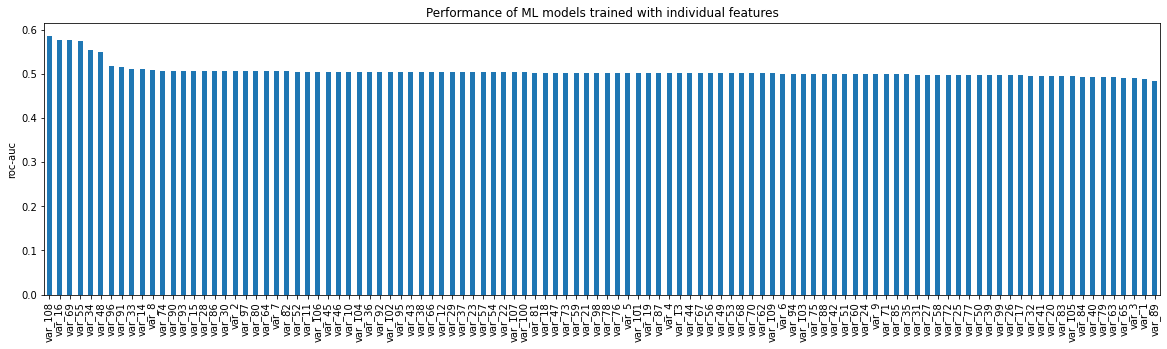

In [7]:
# we can plot feature importance sorted by importance
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('roc-auc')

In [8]:
# the features that will be removed
len(sel.features_to_drop_)

36

In [9]:
# remove non-prective features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train.shape, X_test.shape

((35000, 72), (15000, 72))

## Regression

In [10]:
data = pd.read_csv('../houseprice.csv')
print(data.shape)
data.head(1)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [11]:
# I will use only numerical variables select numerical columns:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [12]:
data.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500


In [13]:
# fill missing values
data.fillna(0, inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['Id','SalePrice'], axis=1),data['SalePrice'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [15]:
# set up the machine learning model
rf = RandomForestRegressor( n_estimators=10, max_depth=2, random_state=1, n_jobs=4)
# set up the selector
sel = SelectBySingleFeaturePerformance(variables=None,estimator=rf,scoring="r2",cv=3,threshold=0.5, )
# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=2,
                                                                 n_estimators=10,
                                                                 n_jobs=4,
                                                                 random_state=1),
                                 scoring='r2', threshold=0.5)

In [16]:
# the transformer stores a dictionary of feature:metric pairs notice that the r2 can be positive or negative. the selector selects based on the absolute value
sel.feature_performance_

{'MSSubClass': 0.18514034601982418,
 'LotFrontage': 0.1129543796082455,
 'LotArea': 0.18072827270865235,
 'OverallQual': 0.6390607189504983,
 'OverallCond': 0.10099732436450067,
 'YearBuilt': 0.3496918758852814,
 'YearRemodAdd': 0.26011141213081274,
 'MasVnrArea': 0.16739999652926915,
 'BsmtFinSF1': 0.19898086671343473,
 'BsmtFinSF2': -0.009703547431066198,
 'BsmtUnfSF': 0.05878832827833499,
 'TotalBsmtSF': 0.4067200681744639,
 '1stFlrSF': 0.34510202976681503,
 '2ndFlrSF': 0.2198806767248371,
 'LowQualFinSF': -0.025701997588528275,
 'GrLivArea': 0.47416720514000604,
 'BsmtFullBath': 0.03495762648889167,
 'BsmtHalfBath': -0.024767451129236395,
 'FullBath': 0.33009421507209774,
 'HalfBath': 0.07062920270257245,
 'BedroomAbvGr': 0.04170276147375148,
 'KitchenAbvGr': 0.0013083175726592937,
 'TotRmsAbvGrd': 0.2638005756723682,
 'Fireplaces': 0.22352442100930417,
 'GarageYrBlt': 0.3244535905924391,
 'GarageCars': 0.47450883716087217,
 'GarageArea': 0.40288417091771045,
 'WoodDeckSF': 0.08310

Text(0, 0.5, 'r2')

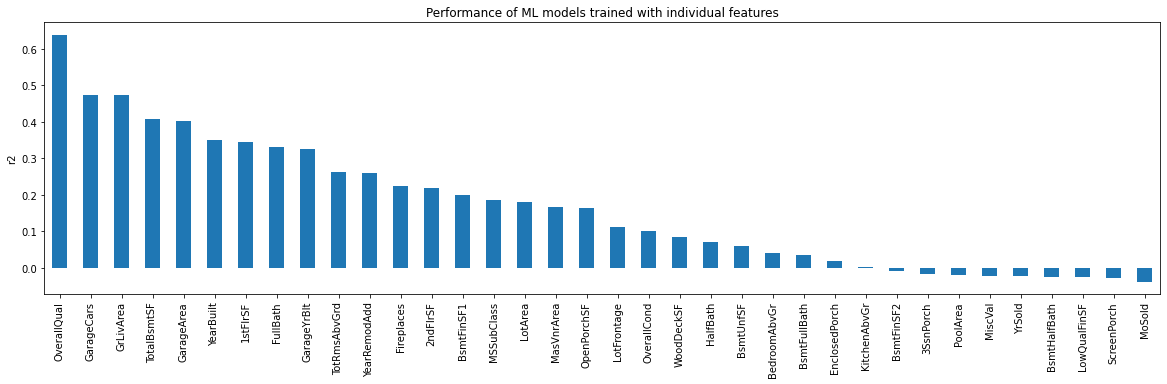

In [17]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2')

Text(0, 0.5, 'r2 - absolute value')

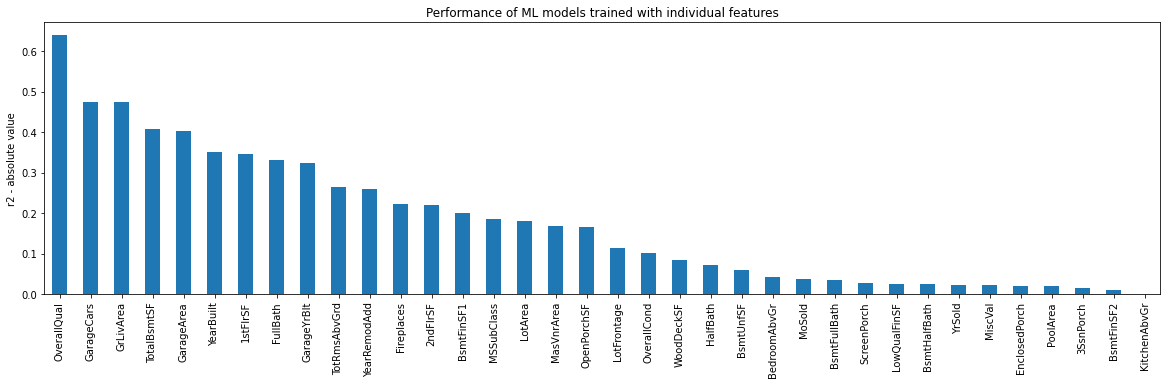

In [18]:
# same plot but taking the absolute value of the r2
np.abs(pd.Series(sel.feature_performance_)).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2 - absolute value')

In [19]:
# the features that will be removed
len(sel.features_to_drop_)

35

In [20]:
# select features in the dataframes
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train.shape, X_test.shape

((1022, 1), (438, 1))

*********************************
*********************************
*********************************
## Select with Target Mean as Performance Proxy

This transformer contains the methods of feature selection described in the notebook **06.2-Method-used-in-a-KDD-competition**

The functionality has now been included in Feature-engine.

Feature-engine automatically detects categorical and numerical variables. 

- Categories in categorical variables will be replaced by the mean value of the target.

- Numerical variables will be first discretised and then, each bin replaced by the target mean value.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from feature_engine.selection import SelectByTargetMeanPerformance

In [22]:
data = pd.read_csv('../titanic.csv')
print(data.shape)
data.head(1)

(1306, 9)


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0,0,0,211.3375,B5,S


In [23]:
# Variable preprocessing:
# then I will narrow down the different cabins by selecting only the first letter, which represents the deck in which the cabin was located

# captures first letter of string (the letter of the cabin)
data['cabin'] = data['cabin'].str[0]

# now we will rename those cabin letters that appear only 1 or 2 in the dataset by N

# replace rare cabins by N
data['cabin'] = np.where(data['cabin'].isin(['T', 'G']), 'N', data['cabin'])
data['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', 'N', 'F'], dtype=object)

In [24]:
# number of passenges per cabin
data['cabin'].value_counts()

N    1019
C      94
B      63
D      46
E      41
A      22
F      21
Name: cabin, dtype: int64

In [25]:
# number of passengers per value
data['parch'].value_counts()

0    999
1    170
2    113
3      8
4      6
5      6
6      2
9      2
Name: parch, dtype: int64

In [26]:
# cap variable at 3, the rest of the values are shown by too few observations
data['parch'] = np.where(data['parch']>3,3,data['parch'])

In [27]:
data['sibsp'].value_counts()

0    888
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [28]:
# cap variable at 3, the rest of the values are shown by too few observations
data['sibsp'] = np.where(data['sibsp']>3,3,data['sibsp'])

In [29]:
# cast discrete variables as categorical
# feature-engine considers categorical variables all those of type object. So in order to work with numerical variables as if they 
# were categorical, we  need to cast them as object
data[['pclass','sibsp','parch']] = data[['pclass','sibsp','parch']].astype('O')

In [30]:
# check absence of missing data
data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(['survived'], axis=1), data['survived'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((914, 8), (392, 8))

In [33]:
# feautre engine automates the selection for both categorical and numerical variables

sel = SelectByTargetMeanPerformance(
    variables=None, # automatically finds categorical and numerical variables
    scoring="roc_auc", # the metric to evaluate performance
    threshold=0.6, # the threshold for feature selection, 
    bins=3, # the number of intervals to discretise the numerical variables
    strategy="equal_frequency", # whether the intervals should be of equal size or equal number of observations
    cv=2,# cross validation
    regression=False, # whether this is regression or classification 
)

sel.fit(X_train, y_train)

SelectByTargetMeanPerformance(bins=3, cv=2, strategy='equal_frequency',
                              threshold=0.6)

In [34]:
# here the selector stores the roc-auc per feature
sel.feature_performance_

{'pclass': 0.6798614277309268,
 'sex': 0.7491001943282519,
 'age': 0.5581472195335474,
 'sibsp': 0.5563082996205047,
 'parch': 0.5696414230138407,
 'fare': 0.6603974806466256,
 'cabin': 0.63880017706053,
 'embarked': 0.5630695122556864}

In [35]:
# and these are the features that will be dropped
sel.features_to_drop_

['age', 'sibsp', 'parch', 'embarked']

In [36]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train.shape, X_test.shape

((914, 4), (392, 4))